In [1]:
import pyspark
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.classification import NaiveBayes
from pyspark.mllib.linalg import Vectors
import matplotlib.pyplot as plt
from random import shuffle
import numpy as np
import math

sc = pyspark.SparkContext('local[*]')

In [9]:
"""
For a given testing set, the model is tested and then, the accuracy and some other statistics are shown
"""

def TryModel(testing_set):
    
    testing_set_rdd = sc.parallelize(testing_set)
    
    home_win_model_predicts_home = 0
    home_win_model_predicts_draw = 0
    home_win_model_predicts_away = 0
    draw_model_predicts_home = 0
    draw_model_predicts_draw = 0
    draw_model_predicts_away = 0
    away_win_model_predicts_home = 0
    away_win_model_predicts_draw = 0
    away_win_model_predicts_away = 0
    for bet in testing_set:
        tobj = Vectors.dense(bet[1])
        if bet[0] == 1:
            if modelbayes1.predict(tobj) == 1:
                home_win_model_predicts_home += 1
            elif modelbayes1.predict(tobj) == 0:
                home_win_model_predicts_draw += 1
            elif modelbayes1.predict(tobj) == -1:
                home_win_model_predicts_away += 1
        elif bet[0] == 0:
            if modelbayes1.predict(tobj) == 1:
                draw_model_predicts_home += 1
            elif modelbayes1.predict(tobj) == 0:
                draw_model_predicts_draw += 1
            elif modelbayes1.predict(tobj) == -1:
                draw_model_predicts_away += 1
        elif bet[0] == -1:
            if modelbayes1.predict(tobj) == 1:
                away_win_model_predicts_home += 1
            elif modelbayes1.predict(tobj) == 0:
                away_win_model_predicts_draw += 1
            elif modelbayes1.predict(tobj) == -1:
                away_win_model_predicts_away += 1
        #print("Most probable value for ", tobj, " : ", modelbayes1.predict(tobj), "-> REAL RESULT: ", bet[0])

    print("Detailed Statistics")
    labels = ['home_win_model_predicts_home', 'home_win_model_predicts_draw', 'home_win_model_predicts_away',
    'draw_model_predicts_home', 'draw_model_predicts_draw', 'draw_model_predicts_away',
    'away_win_model_predicts_home', 'away_win_model_predicts_draw', 'away_win_model_predicts_away']
    sizes = [home_win_model_predicts_home, home_win_model_predicts_draw, home_win_model_predicts_away, 
            draw_model_predicts_home, draw_model_predicts_draw, draw_model_predicts_away,
            away_win_model_predicts_home, away_win_model_predicts_draw, away_win_model_predicts_away]
    explode = (0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1)
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal') 
    plt.show()
        
    print("Total hits (" 
          + str(home_win_model_predicts_home + draw_model_predicts_draw + away_win_model_predicts_away) 
          + "/" + str(len(testing_set)) + ")")
    
    labels = 'Hits', 'No-Hits'
    sizes = [(home_win_model_predicts_home + draw_model_predicts_draw + away_win_model_predicts_away) * 100 / len(testing_set), 
             100 - (home_win_model_predicts_home + draw_model_predicts_draw + away_win_model_predicts_away) * 100 / len(testing_set)]
    explode = (0.1, 0.0)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal') 
    plt.show()
    
    print("Home win hits (" 
          + str(home_win_model_predicts_home) 
          + "/" + str(testing_set_rdd.filter(lambda element : element[0] == 1).count()) + ")")
    if(testing_set_rdd.filter(lambda element : element[0] == 1).count() > 0):
        sizes = [(home_win_model_predicts_home) * 100 / testing_set_rdd.filter(lambda element : element[0] == 1).count(), 
                 100 - (home_win_model_predicts_home) * 100 / testing_set_rdd.filter(lambda element : element[0] == 1).count()]
        explode = (0.1, 0.0)


        fig1, ax1 = plt.subplots()
        ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                shadow=True, startangle=90)
        ax1.axis('equal') 
        plt.show()

    print("Draw hits (" 
          + str(draw_model_predicts_draw) 
          + "/" + str(testing_set_rdd.filter(lambda element : element[0] == 0).count()) + ")")
    if(testing_set_rdd.filter(lambda element : element[0] == 0).count() > 0):
        sizes = [(draw_model_predicts_draw) * 100 / testing_set_rdd.filter(lambda element : element[0] == 0).count(), 
                 100 - (draw_model_predicts_draw) * 100 / testing_set_rdd.filter(lambda element : element[0] == 0).count()]
        explode = (0.1, 0.0)

        fig1, ax1 = plt.subplots()
        ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                shadow=True, startangle=90)
        ax1.axis('equal') 
        plt.show()

    print("Away win hits (" 
          + str(away_win_model_predicts_away) 
          + "/" + str(testing_set_rdd.filter(lambda element : element[0] == -1).count()) + ")")
    if(testing_set_rdd.filter(lambda element : element[0] == -1).count() > 0):
        sizes = [(away_win_model_predicts_away) * 100 / testing_set_rdd.filter(lambda element : element[0] == -1).count(), 
                 100 - (away_win_model_predicts_away) * 100 / testing_set_rdd.filter(lambda element : element[0] == -1).count()]
        explode = (0.1, 0.0)

        fig1, ax1 = plt.subplots()
        ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                shadow=True, startangle=90)
        ax1.axis('equal') 
        plt.show()

In [3]:
def remove_duplicates(lst):
    seen = set()
    seen_add = seen.add
    return [x for x in lst if not (x in seen or seen_add(x))]

def result_to_numeric(result):
    if(result == 'H'):
        return 1
    elif(result == 'D'):
        return 0
    elif(result == 'A'):
        return -1

def group(lst):
    grouped_bets = []
    iteration = 0
    for index in range(len(lst)/3):
        if lst[iteration*3] != "" and lst[iteration*3 + 1] != "" and lst[iteration*3 + 2] != "":
            try:
                grouped_bets.append(float(lst[iteration*3]))
                grouped_bets.append(float(lst[iteration*3 + 1]))
                grouped_bets.append(float(lst[iteration*3 + 2]))
            except ValueError:
                raise ValueError("Could not convert to float some of these: ", lst[iteration*3] + "_" + lst[iteration*3 + 1] + "_" + lst[iteration*3 +2])
        iteration += 1
    return grouped_bets

Bet Houses: [u'B365', u'BS', u'BW', u'GB', u'IW', u'LB', u'SB', u'SJ', u'VC', u'WH']
[LabeledPoint(1.0, [1.53,4.0,6.0,1.53,4.0,6.0,1.5,3.6,6.0,1.5,3.75,6.0,1.5,3.7,5.0,1.57,3.75,6.0,1.5,3.7,6.0,1.44,4.0,6.5,1.5,4.0,6.0,1.5,3.6,5.5]), LabeledPoint(1.0, [3.0,3.25,2.2,2.75,3.25,2.25,2.85,3.2,2.25,2.86,3.2,2.25,2.8,3.1,2.2,2.75,3.2,2.25,3.0,3.2,2.2,2.88,3.25,2.25,3.0,3.2,2.2,2.8,3.2,2.2]), LabeledPoint(1.0, [1.5,3.8,7.5,1.5,3.75,6.5,1.55,3.65,5.25,1.5,3.75,6.0,1.5,3.7,5.0,1.44,4.0,8.0,1.45,3.75,7.0,1.5,3.6,6.5,1.44,3.75,7.0,1.44,3.6,6.5]), LabeledPoint(1.0, [2.2,3.2,3.4,2.2,3.1,3.4,2.2,3.3,3.4,2.15,3.2,3.3,2.1,3.2,3.2,2.2,3.1,3.5,2.1,3.1,3.3,2.25,3.25,3.2,2.2,3.3,3.6,2.2,3.2,3.4]), LabeledPoint(-1.0, [2.2,3.1,3.5,2.2,3.2,3.0,2.2,3.2,2.9,2.2,3.1,3.1,2.2,3.0,2.9,2.25,3.1,2.8,2.2,3.2,3.0,2.2,3.2,3.25,2.15,3.1,3.4,2.2,3.1,3.1])]
('\n Model parameters: \n', '  labels: ', array([-1.,  0.,  1.]), '\n  prior probabilities (log of): ', array([-1.27320154, -1.32432444, -0.78947429]), '\n  factor pro

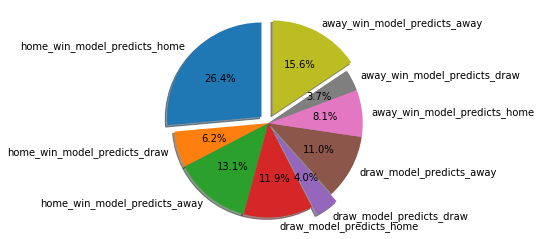

Total hits (1580/3433)


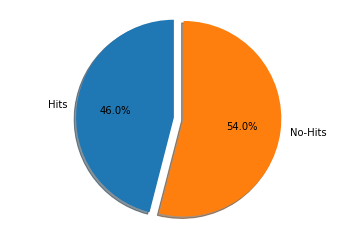

Home win hits (907/1571)


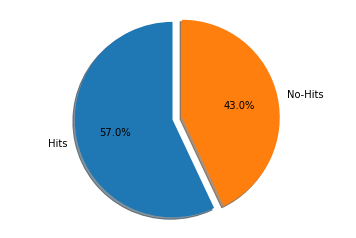

Draw hits (137/923)


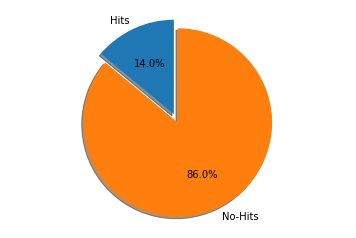

Away win hits (536/939)


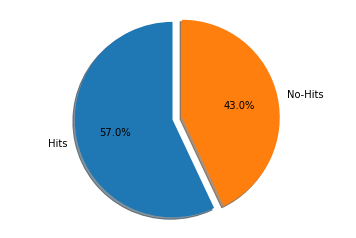

In [4]:
"""
The model is created, trained and tested for the dataset main_competitions.csv. 
The dataset is devided in 90% for training and 10% for testing
"""

bets_csv_file = sc.textFile("../Data/Processed/main_competitions.csv")

bet_houses = remove_duplicates(bets_csv_file.map(lambda line: line.split(","))\
        .map(lambda line : map(lambda bet_house : bet_house[:-1], line[8:38])).take(1)[0])

print("Bet Houses: " + str(bet_houses))

bets = bets_csv_file.map(lambda line: line.split(","))\
        .filter(lambda line : line[0] != "Country")\
        .map(lambda line: (result_to_numeric(line[7]), group(line[8:38])))\
        .filter(lambda element : len(element[1]) == len(bet_houses) * 3)

bets_list = bets.collect()
shuffle(bets_list)

training_set_length = int(len(bets_list)*0.9)

training_set = bets_list[:training_set_length]
testing_set = bets_list[training_set_length:]

bayes1RDD = sc.parallelize(training_set).map( lambda element :  LabeledPoint(element[0], Vectors.dense( element[1] ) ) )

print (bayes1RDD.take(5))

modelbayes1 = NaiveBayes.train(bayes1RDD)
print ( "\n Model parameters: \n", "  labels: ", modelbayes1.labels, \
"\n  prior probabilities (log of): ", modelbayes1.pi,   \
"\n  factor probabilities (log of): ", modelbayes1.theta, "\n")

# Make prediction and test accuracy on the training set.
predictionAndLabel = bayes1RDD.map(lambda p: (modelbayes1.predict(p.features), p.label))
accuracy = 1.0 * predictionAndLabel.filter(lambda pandl: pandl[0] == pandl[1]).count() / bayes1RDD.count()
print ( "Accuracy of the model obtained on training data : ", accuracy, "\n")


TryModel(testing_set)

In [5]:
"""
This function is used in order to get the probabilities for the three different results 
(local win, draw on away win).
"""

def get_full_probabilities(modelbayes, testing_set):
    for entry in testing_set:
        result = entry[0]
        bets = entry[1]
        
        result_matrix = np.matmul(modelbayes.theta, bets) + modelbayes.pi
    
        summatorial = 0
        for element in result_matrix:
            summatorial += math.e**element

        normalized_result_matrix = []
        for element in result_matrix:
            normalized_result_matrix.append(math.e**element / summatorial)

        normalized_result_matrix.reverse()

        print(normalized_result_matrix)
        print("Model predicted " + str(modelbayes.predict(Vectors.dense(bets))) 
              + " and the real result is " + str(result))

In [6]:
get_full_probabilities(modelbayes1, testing_set)

[0.1068961333457678, 0.3938380886967369, 0.4992657779574953]
Model predicted -1.0 and the real result is 1
[0.9987750314790482, 0.0012246273757436684, 3.4114520815055247e-07]
Model predicted 1.0 and the real result is 1
[0.9999999536575357, 4.6342464313683645e-08, 0.0]
Model predicted 1.0 and the real result is 1
[0.008760725454677896, 0.15159746891660944, 0.8396418056287126]
Model predicted -1.0 and the real result is 0
[0.9804723648232248, 0.019410777807013436, 0.0001168573697618282]
Model predicted 1.0 and the real result is 1
[0.9338068640176502, 0.06464715134034357, 0.0015459846420061525]
Model predicted 1.0 and the real result is 1
[0.9936541280063772, 0.00633464217215949, 1.1229821463243277e-05]
Model predicted 1.0 and the real result is 1
[0.32810603224926405, 0.45116588102248595, 0.22072808672825003]
Model predicted 0.0 and the real result is 0
[0.18683954523248664, 0.43919088611655444, 0.37396956865095893]
Model predicted 0.0 and the real result is 1
[0.9999948015267321, 5.19

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


Model predicted -1.0 and the real result is -1
[0.05024838174237556, 0.313217921609976, 0.6365336966476485]
Model predicted -1.0 and the real result is 1
[0.37055515905224273, 0.44676225378382844, 0.18268258716392896]
Model predicted 0.0 and the real result is 1
[0.4547054650365863, 0.415131961036882, 0.13016257392653177]
Model predicted 1.0 and the real result is 1
[0.7921147938944969, 0.1917169790603088, 0.016168227045194425]
Model predicted 1.0 and the real result is 1
[0.05174489640027626, 0.3128037622094538, 0.6354513413902699]
Model predicted -1.0 and the real result is 1
[0.9750120674715848, 0.02478990528607455, 0.00019802724234076397]
Model predicted 1.0 and the real result is 1
[0.9842994290203751, 0.01562716526359601, 7.340571602888732e-05]
Model predicted 1.0 and the real result is 1
[0.9870150910312293, 0.01293573346929504, 4.91754994755999e-05]
Model predicted 1.0 and the real result is 1
[0.0006562338890984481, 0.04675902636064964, 0.952584739750252]
Model predicted -1.0 

[0.5465155934273793, 0.3674735753984313, 0.08601083117418938]
Model predicted 1.0 and the real result is 1
[0.2402136437474525, 0.4611757904792916, 0.29861056577325584]
Model predicted 0.0 and the real result is 1
[0.951810794978973, 0.04744429893896486, 0.0007449060820620294]
Model predicted 1.0 and the real result is 0
[0.9998803950125998, 0.00011960235839426226, 2.6290059598457213e-09]
Model predicted 1.0 and the real result is 0
[0.04100628036032296, 0.2834453176300361, 0.675548402009641]
Model predicted -1.0 and the real result is 0
[0.9999997398899396, 2.6011005372388325e-07, 6.637068850813478e-15]
Model predicted 1.0 and the real result is 1
[0.041514532512471135, 0.2849083294303841, 0.6735771380571448]
Model predicted -1.0 and the real result is 0
[0.2598973262454615, 0.45508754510429456, 0.2850151286502439]
Model predicted 0.0 and the real result is 1
[nan, nan, nan]
Model predicted 1.0 and the real result is 1
[0.2052001298776912, 0.4490100826722645, 0.3457897874500444]
Model

[0.00011691232562146457, 0.020962249427966276, 0.9789208382464122]
Model predicted -1.0 and the real result is 0
[0.9989639381373289, 0.001035810526006505, 2.513366646653714e-07]
Model predicted 1.0 and the real result is 0
[0.8175442961037566, 0.1705127865519022, 0.01194291734434114]
Model predicted 1.0 and the real result is -1
[0.930237750163829, 0.06817229128264317, 0.0015899585535278083]
Model predicted 1.0 and the real result is -1
[0.09288416768604724, 0.38061539869531263, 0.5265004336186401]
Model predicted -1.0 and the real result is 0
[0.036731976461585276, 0.275558476111103, 0.6877095474273117]
Model predicted -1.0 and the real result is -1
[0.8413060888720767, 0.1499059489017864, 0.008787962226136963]
Model predicted 1.0 and the real result is 1
[0.02616030073710511, 0.23940710695509096, 0.734432592307804]
Model predicted -1.0 and the real result is 0
[0.0041923754486235575, 0.10832247781775457, 0.8874851467336218]
Model predicted -1.0 and the real result is 1
[0.2984543958

Model predicted -1.0 and the real result is 0
[0.09197180998505804, 0.37809662374522013, 0.5299315662697218]
Model predicted -1.0 and the real result is 1
[0.06509469118275787, 0.3345603034775204, 0.6003450053397217]
Model predicted -1.0 and the real result is 1
[0.3364395884514414, 0.45359344580459243, 0.20996696574396614]
Model predicted 0.0 and the real result is -1
[0.028716457344002567, 0.246742693911996, 0.7245408487440015]
Model predicted -1.0 and the real result is -1
[0.05846796175393443, 0.3260830390176866, 0.615448999228379]
Model predicted -1.0 and the real result is -1
[0.6645323711119642, 0.29083276414552367, 0.04463486474251222]
Model predicted 1.0 and the real result is 1
[0.6910765239687089, 0.27095710144817914, 0.03796637458311199]
Model predicted 1.0 and the real result is 1
[0.7376708838882013, 0.23697972473188256, 0.02534939137991606]
Model predicted 1.0 and the real result is 1
[0.0018968885868581897, 0.0765084646934978, 0.9215946467196441]
Model predicted -1.0 an

Model predicted -1.0 and the real result is 1
[0.9547719815639009, 0.044584870641905215, 0.0006431477941939865]
Model predicted 1.0 and the real result is 1
[0.00019216104396822936, 0.026671457968534425, 0.9731363809874973]
Model predicted -1.0 and the real result is 0
[0.03239581452733651, 0.26395124420888677, 0.7036529412637768]
Model predicted -1.0 and the real result is 0
[0.5562955620347773, 0.36266735825386115, 0.08103707971136163]
Model predicted 1.0 and the real result is 0
[0.00219655818473044, 0.08108374962484999, 0.9167196921904197]
Model predicted -1.0 and the real result is -1
[0.4352841679268627, 0.42067836761204147, 0.14403746446109594]
Model predicted 1.0 and the real result is -1
[0.9116000788789355, 0.0857898638049133, 0.0026100573161512205]
Model predicted 1.0 and the real result is 1
[0.1474468855517473, 0.42320357102618156, 0.4293495434220712]
Model predicted -1.0 and the real result is 0
[0.07281962857387766, 0.349826287176511, 0.5773540842496114]
Model predicted 

Model predicted -1.0 and the real result is 1
[1.5181527831721663e-06, 0.0027961983961332392, 0.9972022834510836]
Model predicted -1.0 and the real result is -1
[0.5864026616529507, 0.34216318850951016, 0.07143414983753904]
Model predicted 1.0 and the real result is 1
[0.5329778049237264, 0.3750321085119753, 0.0919900865642984]
Model predicted 1.0 and the real result is 1
[0.036144654368072834, 0.27431197556969755, 0.6895433700622298]
Model predicted -1.0 and the real result is -1
[0.3451748469016276, 0.45112837182432985, 0.20369678127404253]
Model predicted 0.0 and the real result is 1
[0.36281339341908486, 0.44412968074687925, 0.19305692583403594]
Model predicted 0.0 and the real result is 1
[0.4983655613885503, 0.39363509997186164, 0.1079993386395881]
Model predicted 1.0 and the real result is 1
[0.8820165611147102, 0.1132507488099524, 0.004732690075337429]
Model predicted 1.0 and the real result is 1
[0.004814076844902284, 0.11615484101915095, 0.8790310821359467]
Model predicted -1

Model predicted -1.0 and the real result is 1
[0.7724290975978341, 0.20847419592662927, 0.019096706475536625]
Model predicted 1.0 and the real result is 1
[3.8575028605004715e-09, 0.00017551574405470384, 0.9998244803984425]
Model predicted -1.0 and the real result is 0
[0.02609338113501298, 0.23794498811118872, 0.7359616307537982]
Model predicted -1.0 and the real result is -1
[0.013590535075683998, 0.18151267469192156, 0.8048967902323945]
Model predicted -1.0 and the real result is -1
[0.13294528232946684, 0.41094286467115443, 0.4561118529993786]
Model predicted -1.0 and the real result is -1
[0.9771711170298162, 0.022670758851103243, 0.0001581241190804894]
Model predicted 1.0 and the real result is 0
[0.9673299949029902, 0.03232126839429494, 0.000348736702714767]
Model predicted 1.0 and the real result is 1
[0.9834416882017157, 0.01647719480258981, 8.111699569451517e-05]
Model predicted 1.0 and the real result is 1
[0.8612590658870658, 0.1318089780595353, 0.006931956053398877]
Model 

Model predicted 1.0 and the real result is 0
[0.30064136237287503, 0.4541693516609801, 0.2451892859661449]
Model predicted 0.0 and the real result is -1
[0.1042119991506368, 0.3909981701182035, 0.5047898307311598]
Model predicted -1.0 and the real result is 1
[0.6006158181347654, 0.33356116448259937, 0.06582301738263531]
Model predicted 1.0 and the real result is 0
[0.022065129386531074, 0.22577483396380021, 0.7521600366496688]
Model predicted -1.0 and the real result is 1
[0.258903943677666, 0.46000402607407237, 0.2810920302482615]
Model predicted 0.0 and the real result is 1
[0.016846128952692423, 0.1994467012734432, 0.7837071697738643]
Model predicted -1.0 and the real result is -1
[0.9873789089610319, 0.012574578593061516, 4.65124459066836e-05]
Model predicted 1.0 and the real result is 1
[0.31828628242079365, 0.4566909246265427, 0.22502279295266367]
Model predicted 0.0 and the real result is 1
[0.9974969451944227, 0.0025014147799281394, 1.6400256491102061e-06]
Model predicted 1.0 

Bet Houses: [u'B365', u'BW', u'IW', u'LB']
[LabeledPoint(-1.0, [1.28,5.25,9.5,1.3,5.0,9.5]), LabeledPoint(0.0, [2.62,3.1,2.75,2.55,3.2,2.85]), LabeledPoint(1.0, [2.04,3.0,4.09,2.05,3.1,4.0]), LabeledPoint(1.0, [2.2,2.9,3.6,2.2,2.9,3.55]), LabeledPoint(1.0, [1.75,3.5,4.75,1.75,3.6,4.25])]
('\n Model parameters: \n', '  labels: ', array([-1.,  0.,  1.]), '\n  prior probabilities (log of): ', array([-1.17007125, -1.42138568, -0.80234647]), '\n  factor probabilities (log of): ', array([[-2.07986825, -1.8128855 , -1.56367932, -2.00783548, -1.8194429 ,
        -1.57933873],
       [-1.48134402, -1.9588254 , -2.06855779, -1.44753799, -1.95651859,
        -2.04966521],
       [-2.22785842, -1.81075062, -1.46951647, -2.22388228, -1.81793628,
        -1.47786476]]), '\n')
('Accuracy of the model obtained on training data : ', 0.5384615384615384, '\n')
Detailed Statistics


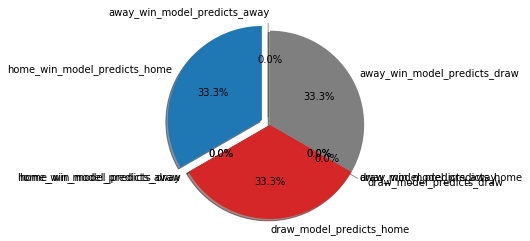

Total hits (1/3)


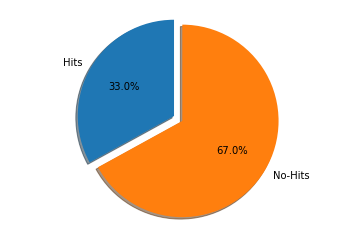

Home win hits (1/1)


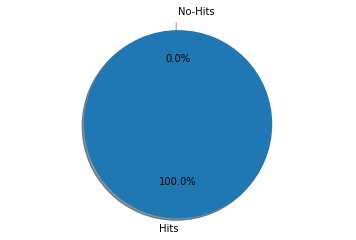

Draw hits (0/1)


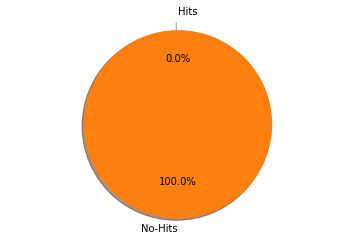

Away win hits (0/1)


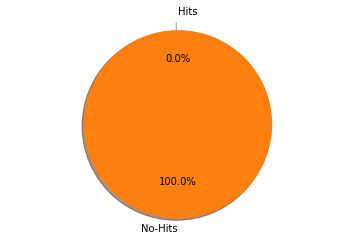

In [10]:
"""
The model is created, trained and tested for the dataset main_competitions_1819.csv. 
The dataset is devided in 90% for training and 10% for testing
"""

bets_csv_file = sc.textFile("../Data/Processed/main_competitions_recent.csv")

bet_houses = remove_duplicates(bets_csv_file.map(lambda line: line.split(","))\
        .map(lambda line : map(lambda bet_house : bet_house[:-1], line[8:20])).take(1)[0])

print("Bet Houses: " + str(bet_houses))

bets = bets_csv_file.map(lambda line: line.split(","))\
        .filter(lambda line : line[0] != "Country")\
        .map(lambda line: (result_to_numeric(line[7]), group(line[8:20])))\
        .filter(lambda element : len(element[1]) == (len(bet_houses)-2) * 3)

bets_list = bets.collect()
shuffle(bets_list)

training_set_length = int(len(bets_list)*0.9)

training_set = bets_list[:training_set_length]
testing_set = bets_list[training_set_length:]

bayes1RDD = sc.parallelize(training_set).map( lambda element :  LabeledPoint(element[0], Vectors.dense( element[1] ) ) )

print (bayes1RDD.take(5))

modelbayes1 = NaiveBayes.train(bayes1RDD)
print ( "\n Model parameters: \n", "  labels: ", modelbayes1.labels, \
"\n  prior probabilities (log of): ", modelbayes1.pi,   \
"\n  factor probabilities (log of): ", modelbayes1.theta, "\n")

# Make prediction and test accuracy on the training set.
predictionAndLabel = bayes1RDD.map(lambda p: (modelbayes1.predict(p.features), p.label))
accuracy = 1.0 * predictionAndLabel.filter(lambda pandl: pandl[0] == pandl[1]).count() / bayes1RDD.count()
print ( "Accuracy of the model obtained on training data : ", accuracy, "\n")


TryModel(testing_set)

In [11]:
get_full_probabilities(modelbayes1, testing_set)

[0.6673392459181464, 0.004830708006224294, 0.3278300460756294]
Model predicted 1.0 and the real result is 1
[6.8646449181958295e-15, 0.9999999999618667, 3.812642510563639e-11]
Model predicted 0.0 and the real result is -1
[0.5756364185113437, 0.03234855104226764, 0.39201503044638863]
Model predicted 1.0 and the real result is 0
